In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load data
df = pd.read_csv('../../Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Preprocessing
df = df.drop('CustomerID', axis=1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
X = df.iloc[:, [1, 2, 3]].values 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [3]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.wcss = 0 
    def fit(self, X):
        n_samples, n_features = X.shape
        idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[idx]
        for i in range(self.max_iters):
            distances = self._calculate_distances(X)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.zeros((self.k, n_features))
            for j in range(self.k):
                if np.any(self.labels == j):
                    new_centroids[j] = np.mean(X[self.labels == j], axis=0)
                else:
                    new_centroids[j] = X[np.random.choice(n_samples)]
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                self.centroids = new_centroids
                break
            self.centroids = new_centroids
        distances = self._calculate_distances(X)
        min_dists = np.min(distances, axis=1)
        self.wcss = np.sum(min_dists ** 2)
        
    def predict(self, X):
        distances = self._calculate_distances(X)
        return np.argmin(distances, axis=1)

    def _calculate_distances(self, X):
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.k))
        for i in range(self.k):
            dist = np.linalg.norm(X - self.centroids[i], axis=1)
            distances[:, i] = dist
        return distances

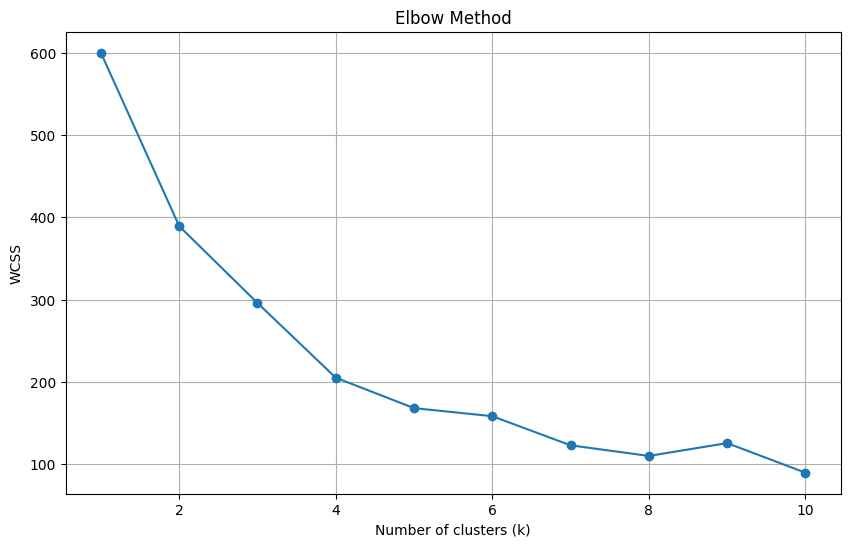

In [4]:
# Elbow Method
wcss_list = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeansScratch(k=k)
    kmeans.fit(X_scaled)
    wcss_list.append(kmeans.wcss)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [5]:
# From Elbow plot, let's assume k=5 is optimal (typical for this dataset)
k_optimal = 6
kmeans_final = KMeansScratch(k=k_optimal)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels
sil_score = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

Silhouette Score: 0.4311
Davies-Bouldin Score: 0.8350


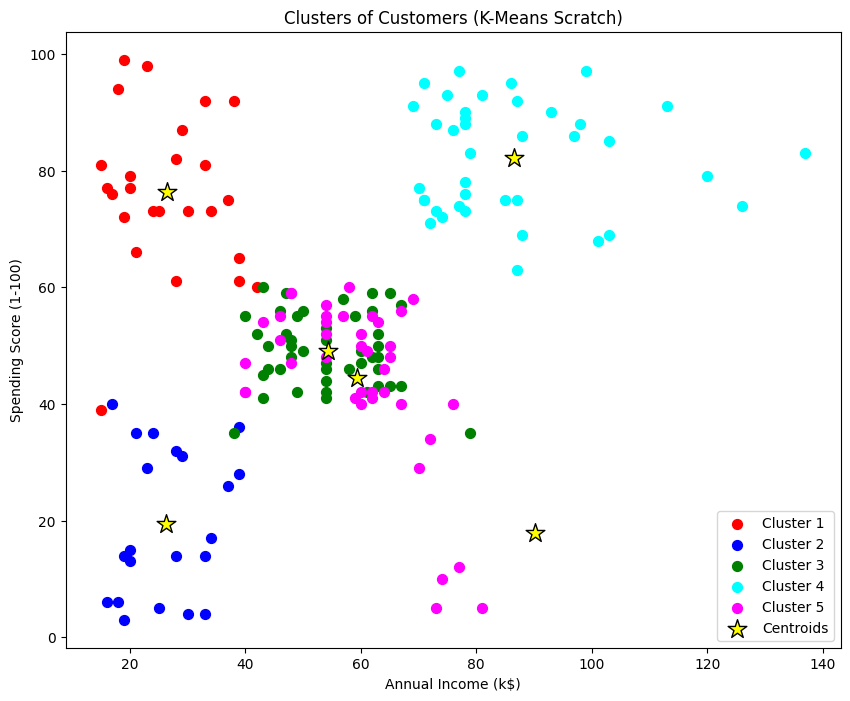

In [6]:
centroids_original = scaler.inverse_transform(kmeans_final.centroids)
plt.figure(figsize=(10, 8))
plt.scatter(X[labels == 0, 1], X[labels == 0, 2], s=50, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 1], X[labels == 1, 2], s=50, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 1], X[labels == 2, 2], s=50, c='green', label='Cluster 3')
plt.scatter(X[labels == 3, 1], X[labels == 3, 2], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[labels == 4, 1], X[labels == 4, 2], s=50, c='magenta', label='Cluster 5')
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], s=200, c='yellow', marker='*', edgecolors='black', label='Centroids')
plt.title('Clusters of Customers (K-Means Scratch)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()